In [6]:
pip install pywavelets


     ---------------------------------------- 4.2/4.2 MB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [15]:
from sklearn.model_selection import train_test_split
vector = np.vectorize(np.float64)
df = pd.read_csv('FTIR_data.csv')
classData=df.loc[1931:].values.tolist()
classData=classData[1:]
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]
encodeClassdata = np.array(encodeClassdata)

labelHeader = df['Raman'].to_list()
vector = np.vectorize(np.float64)
labels = df['Raman']
lab = labels[0:1931]

lables = vector(lab)
PCA_dat = df[0:1931]

PCA_dat = PCA_dat.iloc[:, 1:]
print(PCA_dat.shape)
Input = np.asarray(PCA_dat)
Input.shape, encodeClassdata.shape
Input_T = Input.T

X1_train, X1_test, y_train, y_test = train_test_split(Input_T, encodeClassdata,test_size=0.2, random_state=42)
Input_T.shape

(1931, 60)


(60, 1931)

In [16]:
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.signal import savgol_filter

# Generate example dataset
# Assuming X and y are your feature matrix and target variable respectively


# Apply wavelet transformation as a preprocessing step
def wavelet_savgol_transform(X, wavelet_type, window_length, polyorder):
    transformed_data = []
    for i in range(len(X)):
        # Wavelet transform
        coefficients = pywt.dwt(X[i], wavelet_type)
        transformed_signal = np.concatenate(coefficients)

        # Savitzky-Golay filtering
        smoothed_signal = savgol_filter(transformed_signal, window_length, polyorder)

        transformed_data.append(smoothed_signal)
    return np.array(transformed_data)


X_train_wavelet = wavelet_savgol_transform(X1_train,'db3',5,2)
X_test_wavelet = wavelet_savgol_transform(X1_test,'db3',5,2)

In [17]:
vector = np.vectorize(np.float64)
df = pd.read_csv('Raman_Ndata.csv')
classData = df.loc[264, :].values.tolist()
classData = classData[1:]
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0,1,1,1, 1, 1, 1, 1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1]
encodeClassdata = np.array(encodeClassdata)

labelHeader = df['Raman'].to_list()
vector = np.vectorize(np.float64)
labels = df['Raman']
lab = labels[0:264]
#lab
lables = vector(lab)
PCA_dat = df[0:264]
#PCA_dat.head
PCA_dat = PCA_dat.iloc[:, 1:]
Input = np.asarray(PCA_dat)
#Input.shape, encodeClassdata.shape
Input_T = np.transpose(Input)
#Input_T.shape
#classData
X2_train, X2_test, y2_train, y2_test = train_test_split(Input_T, encodeClassdata,test_size=0.2, random_state=42)


In [18]:
X2_train_wavelet = wavelet_savgol_transform(X2_train,'db3',5,2)
X2_test_wavelet = wavelet_savgol_transform(X2_test,'db3',5,2)
X_train_fused=np.concatenate([X1_train, X2_train], axis=1)
X_test_fused=np.concatenate([X1_test,X2_test],axis=1)

In [19]:

# Scale the wavelet-transformed data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_fused)
X_test= scaler.transform(X_test_fused)


pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

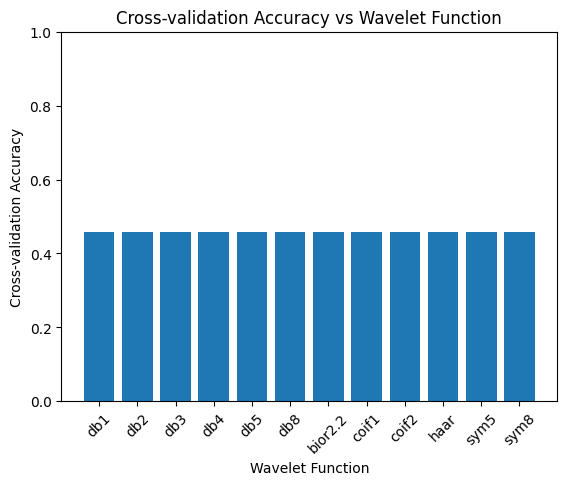

In [20]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from scipy.signal import savgol_filter

# Function to perform Wavelet Transform and Savitzky-Golay filtering

# Apply Wavelet Transform and Savitzky-Golay filtering to the training and test sets
wavelet_functions = ['db1', 'db2', 'db3', 'db4', 'db5', 'db8', 'bior2.2', 'coif1', 'coif2', 'haar', 'sym5', 'sym8']
window_length = 5  # Adjust the window length as needed
polyorder = 2  # Adjust the polynomial order as needed

accuracy_scores = []

for wavelet_type in wavelet_functions:
    X_train_wavelet = wavelet_savgol_transform(X1_train, wavelet_type, window_length, polyorder)
    X_test_wavelet = wavelet_savgol_transform(X1_test, wavelet_type, window_length, polyorder)
    X_train_wavelet = wavelet_savgol_transform(X2_train, wavelet_type, window_length, polyorder)
    X_test_wavelet = wavelet_savgol_transform(X2_test, wavelet_type, window_length, polyorder)
    X_train_fused=np.concatenate([X1_train, X2_train], axis=1)
    X_test_fused=np.concatenate([X1_test,X2_test],axis=1)

    # Scale the wavelet-transformed data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fused)
    X_test_scaled = scaler.transform(X_test_fused)

    # Perform PLS-DA with cross-validation
    n_components = 20
    plsda = PLSRegression(n_components=n_components)

    # Perform cross-validation
    cv_scores = cross_val_score(plsda, X_train_scaled, y_train, cv=5)
    average_cv_accuracy = np.mean(cv_scores)
    accuracy_scores.append(average_cv_accuracy)

# Plot Accuracy vs Wavelet Function
plt.bar(wavelet_functions, accuracy_scores)
plt.xlabel("Wavelet Function")
plt.ylabel("Cross-validation Accuracy")
plt.title("Cross-validation Accuracy vs Wavelet Function")
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()















In [ ]:
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Apply wavelet transform denoising and reconstruct the denoised data
def wavelet_denoising(X, wavelet='db4', threshold=0.05):
    coefficients = pywt.wavedec(X, wavelet)
    thresholded_coefficients = []
    for level, coefficient in enumerate(coefficients):
        if level == 0:
            thresholded_coefficients.append(coefficient)
        else:
            thresholded_coefficients.append(np.where(np.abs(coefficient) > threshold, coefficient, 0))
    
    denoised_X = pywt.waverec(thresholded_coefficients, wavelet)
    return denoised_X

# Load the data
#Input_T = np.load('Input_T.npy')  # Replace with the path to your Input_T data
#encodeClassdata = np.load('encodeClassdata.npy')  # Replace with the path to your encodeClassdata

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(Input_T, encodeClassdata, test_size=0.2, random_state=42)

# Apply wavelet denoising on the training set
denoised_X_train = wavelet_denoising(X_train, wavelet='db4', threshold=0.05)

# Apply the same wavelet denoising on the testing set
denoised_X_test = wavelet_denoising(X_test, wavelet='db4', threshold=0.05)

# Perform additional preprocessing steps
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(denoised_X_train)
X_test_scaled = scaler.transform(denoised_X_test)

# Fit a logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logistic_regression.predict(X_test_scaled)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)


In [9]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# Initialize the PLS-DA model
plsda = PLSRegression(n_components=2)

# Fit the PLS-DA model on the training data
plsda.fit(X_train, y_train)

# Transform the training and test data using PLS-DA
X_train_plsda = plsda.transform(X_train)
X_test_plsda = plsda.transform(X_test)

# Initialize the classifier for PLS-DA
lda = LinearDiscriminantAnalysis()

# Train the classifier on the transformed training data
lda.fit(X_train_plsda, y_train)

# Make predictions using the PLS-DA + LDA classifier
y_pred_plsda = lda.predict(X_test_plsda)

# Evaluate the performance of PLS-DA + LDA
classification_rep_plsda = classification_report(y_test, y_pred_plsda)
confusion_mat_plsda = confusion_matrix(y_test, y_pred_plsda)
accuracy_plsda = np.mean(y_pred_plsda == y_test)

# Perform cross-validation for PLS-DA + LDA
cv_scores_plsda = cross_val_score(lda, X_train_plsda, y_train, cv=5)
mean_cv_score_plsda = np.mean(cv_scores_plsda)

print("PLS-DA + LDA Classifier Performance:")
print(classification_rep_plsda)
print("Confusion Matrix (PLS-DA + LDA):")
print(confusion_mat_plsda)
print("Accuracy (PLS-DA + LDA): {:.2f}".format(accuracy_plsda))
print("Cross-validation accuracy (PLS-DA + LDA): {:.2f}".format(mean_cv_score_plsda))


PLS-DA + LDA Classifier Performance:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.88      0.88      0.88         8

    accuracy                           0.83        12
   macro avg       0.81      0.81      0.81        12
weighted avg       0.83      0.83      0.83        12

Confusion Matrix (PLS-DA + LDA):
[[3 1]
 [1 7]]
Accuracy (PLS-DA + LDA): 0.83
Cross-validation accuracy (PLS-DA + LDA): 0.90


best paramters adaboost {'base_estimator': RandomForestClassifier(), 'learning_rate': 0.1, 'n_estimators': 100}
SVM Classifier Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12

Confusion Matrix (SVM):
[[4 0]
 [1 7]]
Cross-validation accuracy (SVM): 0.93
AdaBoost Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix (AdaBoost):
[[4 0]
 [0 8]]
Cross-validation accuracy (AdaBoost): 0.94
KNN Class

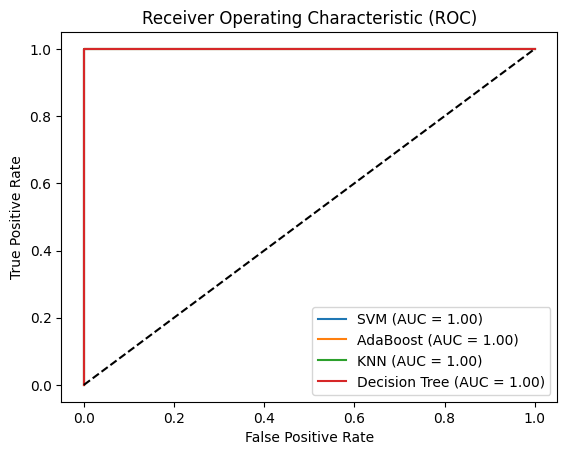

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameters to tune for each model

# Define the parameter grid for each classifier
param_grid = [
    # Parameters for SVM
    {
        'C': [0.1, 1, 10],
        'kernel': ['linear','poly', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    # Parameters for AdaBoost
    {
        'base_estimator': [DecisionTreeClassifier(), RandomForestClassifier()],
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
    },
    # Parameters for KNN
    {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    # Parameters for Decision Tree
    {
        'max_depth': [3, 5, 7],
        'criterion': ['gini', 'entropy']
    }
]

# Initialize the models
svm_clf = svm.SVC()
adaboost = AdaBoostClassifier()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

# Perform hyperparameter tuning for SVM
grid_search_svm = GridSearchCV(svm_clf, param_grid[0], cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters and best score for SVM
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Initialize the best SVM classifier with the best hyperparameters
best_svm = svm.SVC(**best_params_svm)

# Perform cross-validation for SVM
svm_scores = cross_val_score(best_svm, X_train, y_train, cv=5)
mean_svm_score = np.mean(svm_scores)

# Train the best SVM classifier
best_svm.fit(X_train, y_train)

# Perform hyperparameter tuning for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost, param_grid[1], cv=5, scoring='accuracy')
grid_search_adaboost.fit(X_train, y_train)

# Get the best hyperparameters and best score for AdaBoost
best_params_adaboost = grid_search_adaboost.best_params_
print("best paramters adaboost",best_params_adaboost)
best_score_adaboost = grid_search_adaboost.best_score_

# Initialize the best AdaBoost classifier with the best hyperparameters
best_adaboost = AdaBoostClassifier(**best_params_adaboost)

# Perform cross-validation for AdaBoost
adaboost_scores = cross_val_score(best_adaboost, X_train, y_train, cv=5)
mean_adaboost_score = np.mean(adaboost_scores)

# Train the best AdaBoost classifier
best_adaboost.fit(X_train, y_train)

# Perform hyperparameter tuning for KNN
grid_search_knn = GridSearchCV(knn, param_grid[2], cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters and best score for KNN
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Initialize the best KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params_knn)

# Perform cross-validation for KNN
knn_scores = cross_val_score(best_knn, X_train, y_train, cv=5)
mean_knn_score = np.mean(knn_scores)

# Train the best KNN classifier
best_knn.fit(X_train, y_train)

# Perform hyperparameter tuning for Decision Tree
grid_search_dt = GridSearchCV(decision_tree, param_grid[3], cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and best score for Decision Tree
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Initialize the best Decision Tree classifier with the best hyperparameters
best_dt = DecisionTreeClassifier(**best_params_dt)

# Perform cross-validation for Decision Tree
dt_scores = cross_val_score(best_dt, X_train, y_train, cv=5)
mean_dt_score = np.mean(dt_scores)

# Train the best Decision Tree classifier
best_dt.fit(X_train, y_train)

# Make predictions using the best SVM classifier
y_pred_svm = best_svm.predict(X_test)
classification_rep_svm = classification_report(y_test, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Classifier Performance:")
print(classification_rep_svm)
print("Confusion Matrix (SVM):")
print(confusion_mat_svm)
print("Cross-validation accuracy (SVM): {:.2f}".format(mean_svm_score))

# Make predictions using the best AdaBoost classifier
y_pred_adaboost = best_adaboost.predict(X_test)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)
confusion_mat_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print("AdaBoost Classifier Performance:")
print(classification_rep_adaboost)
print("Confusion Matrix (AdaBoost):")
print(confusion_mat_adaboost)
print("Cross-validation accuracy (AdaBoost): {:.2f}".format(mean_adaboost_score))

# Make predictions using the best KNN classifier
y_pred_knn = best_knn.predict(X_test)
classification_rep_knn = classification_report(y_test, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Classifier Performance:")
print(classification_rep_knn)
print("Confusion Matrix (KNN):")
print(confusion_mat_knn)
print("Cross-validation accuracy (KNN): {:.2f}".format(mean_knn_score))

# Make predictions using the best Decision Tree classifier
y_pred_dt = best_dt.predict(X_test)
classification_rep_dt = classification_report(y_test, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Classifier Performance:")
print(classification_rep_dt)
print("Confusion Matrix (Decision Tree):")
print(confusion_mat_dt)
print("Cross-validation accuracy (Decision Tree): {:.2f}".format(mean_dt_score))

# Calculate the ROC curve and AUC for each classifier
svm_probs = best_svm.decision_function(X_test)
adaboost_probs = best_adaboost.predict_proba(X_test)[:, 1]
knn_probs = best_knn.predict_proba(X_test)[:, 1]
dt_probs = best_dt.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, adaboost_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curves
plt.figure()
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost (AUC = {:.2f})'.format(roc_auc_adaboost))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

# Create an SVM model
svm_model = SVC(kernel='linear')

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train_imputed, y_train, cv=5)

# Calculate the mean and standard deviation of the train scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve for SVM')
plt.legend(loc='best')
plt.show()

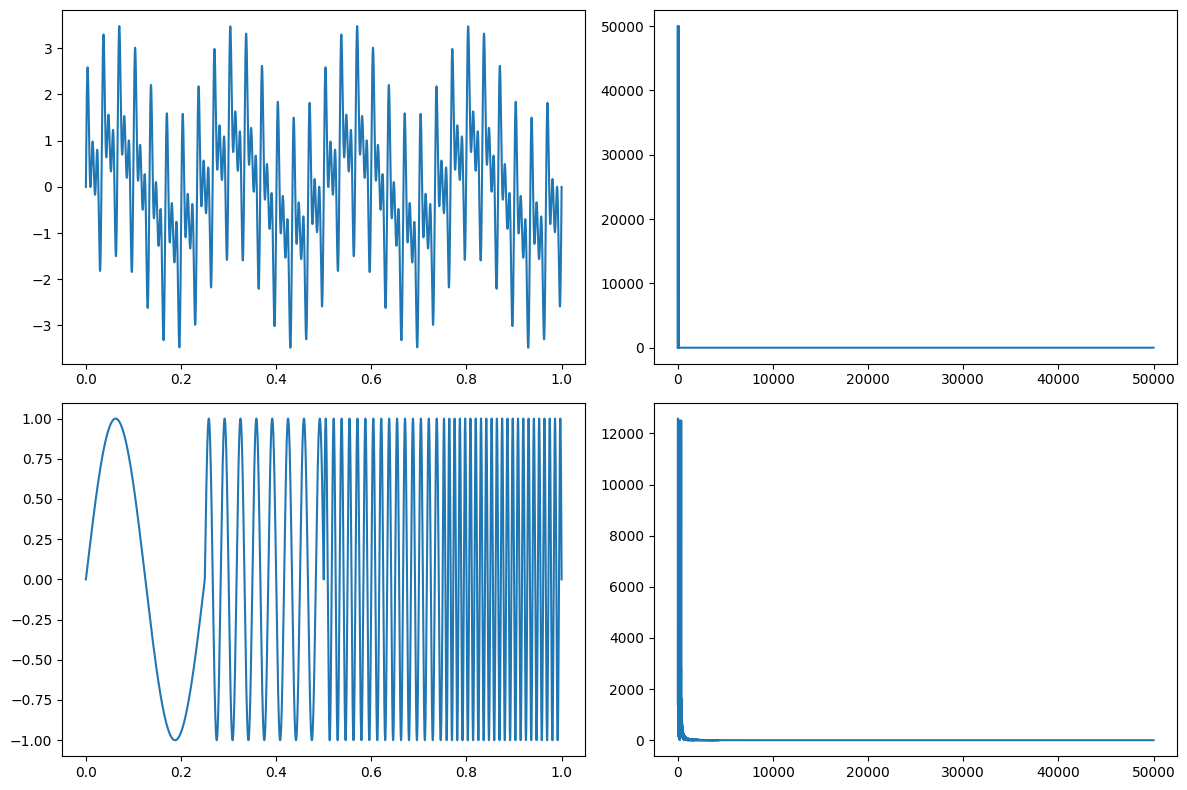

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

t_n = 1
N = 100000
T = t_n / N
f_s = 1 / T

xa = np.linspace(0, t_n, num=N)
xb = np.linspace(0, t_n/4, num=int(N/4))

frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)

composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])

fft_values1 = fft(composite_signal1)
fft_values2 = fft(composite_signal2)

f_values1 = fftfreq(N, T)[:N//2]
f_values2 = fftfreq(int(N/4), T)[:int(N/8)]

fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axarr[0,0].plot(xa, composite_signal1)
axarr[1,0].plot(xa, composite_signal2)
axarr[0,1].plot(f_values1, np.abs(fft_values1)[:N//2])
axarr[1,1].plot(f_values2, np.abs(fft_values2)[:int(N/8)])

plt.tight_layout()
plt.show()



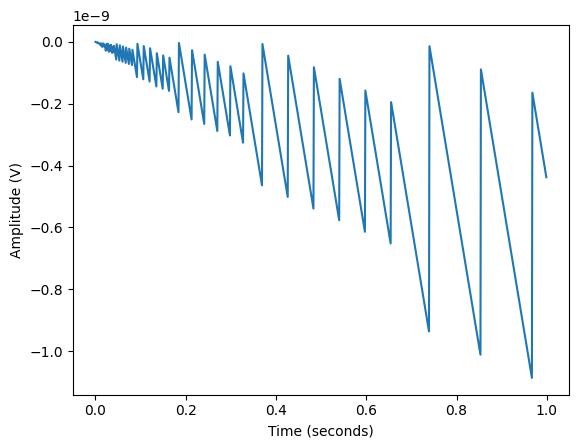

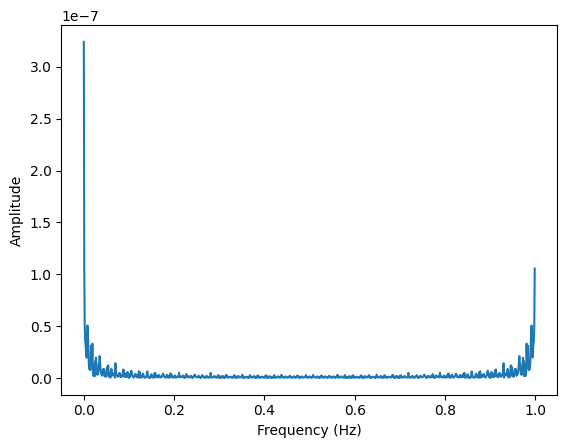

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave signal
frequency = 1000  # Hz
amplitude = 1  # V
duration = 1  # seconds
samples = int(duration * frequency)
signal = amplitude * np.sin(2 * np.pi * frequency * np.arange(samples))

# Calculate the Fourier transform of the signal
fourier_transform = np.fft.fft(signal)

# Plot the time domain signal
plt.plot(np.arange(samples) / frequency, signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (V)')

# Plot the frequency domain signal
plt.figure()
plt.plot(np.arange(samples) / frequency, np.abs(fourier_transform))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.show()


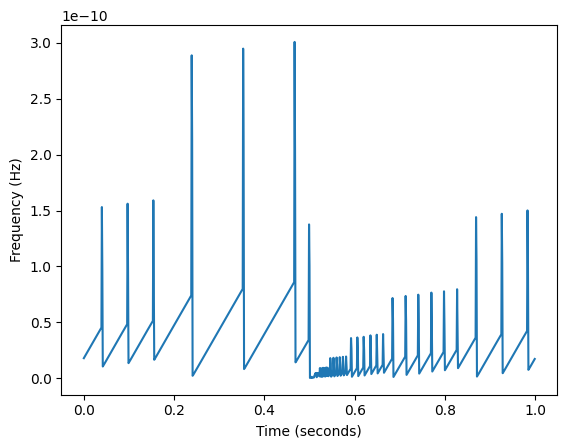

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave signal
frequency = 1000  # Hz
amplitude = 1  # V
duration = 1  # seconds
samples = int(duration * frequency)
signal = amplitude * np.sin(2 * np.pi * frequency * np.arange(samples))

# Calculate the Fourier transform of the signal
fourier_transform = np.fft.fft(signal)

# Plot the spectrogram
spectrogram = np.abs(np.fft.fftshift(np.fft.ifft(fourier_transform * np.hamming(samples))))
plt.plot(np.arange(samples) / frequency, spectrogram)
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

plt.show()


In [ ]:
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Generate example dataset
# Assuming X and y are your feature matrix and target variable respectively
X = np.random.rand(100, 100)  # Example input data
y = np.random.randint(0, 2, 100)  # Example target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply wavelet transformation as a preprocessing step
def wavelet_transform(X):
    transformed_data = []
    for i in range(len(X)):
        coefficients = pywt.dwt(X[i], 'db1')  # Example wavelet type, 'db1' (Daubechies 1)
        transformed_data.append(np.concatenate(coefficients))
    return np.array(transformed_data)

X_train_wavelet = wavelet_transform(X_train)
X_test_wavelet = wavelet_transform(X_test)

# Scale the wavelet-transformed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_wavelet)
X_test_scaled = scaler.transform(X_test_wavelet)

# Initialize and train a machine learning model
model = SVC()  # Example model, Support Vector Classifier (SVC)
model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)
